In [1]:
from process_logs import *

In [2]:
query_no = 9
log_dir = '../../deepola/wake/logs/scale=10/partition=10'
output_dir = '../../deepola/wake/outputs/queries/'
log_file = f'{log_dir}/q{query_no}.log'
df = parse_log_file(log_file)
g = generate_query_graph(df, query_no, output_dir, display=True)
execution_df = get_execution_log_df(df)

In [3]:
execution_df

,start_time,end_time,thread,node,action,duration
153,0.000000,1.699939,ThreadId(2),8bd29,read,1699.939
151,0.000070,1.670792,ThreadId(3),5b01f,read,1670.722
146,0.000106,1.596675,ThreadId(4),1c360,read,1596.569
18,0.000434,0.210868,ThreadId(7),be186,pre-read,210.434
25,0.000567,0.226059,ThreadId(8),87a6c,pre-read,225.492
...,...,...,...,...,...,...
333,5.677574,5.678745,ThreadId(2),8bd29,process,1.171
331,5.677589,5.677605,ThreadId(3),5b01f,read,0.016
332,5.677610,5.677610,ThreadId(3),5b01f,process,0.000
334,5.678762,5.678762,ThreadId(2),8bd29,read,0.000


In [4]:
process_time = execution_df[execution_df['action'] == 'process']
nodes_by_process_time = process_time[['node','duration']].groupby(['node']).sum().sort_values('duration', ascending=False).reset_index()
maximum_duration = nodes_by_process_time['duration'].max()
for index,row in nodes_by_process_time.iterrows():
    relative_duration = min(9,int((10*row['duration'])/maximum_duration))
    g.node(row['node'], style='filled', fillcolor=f"/oranges9/{1 if relative_duration <= 0 else relative_duration}")
g.render(directory=output_dir).replace('\\', '/')

'../../deepola/wake/outputs/queries/q9.gv.png'

In [5]:
nodes_by_process_time

,node,duration
0,87a6c,4501.318
1,355d5,1889.012
2,20564,1595.353
3,052b7,1472.182
4,be186,1252.083
5,fadc0,1093.359
6,bc283,775.750
7,18126,771.208
8,5b01f,768.557
9,1c360,767.677


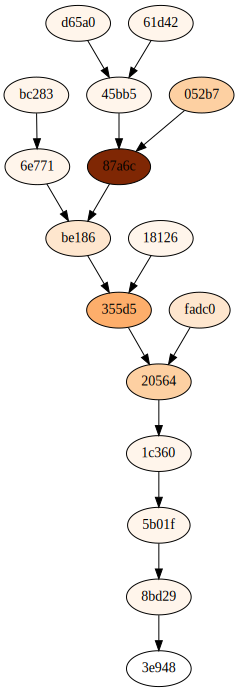

In [6]:
g